TTF in the title means time to failure.

Train data shows earth quake being after a big signal of acoustic data. In this kernel, analyzing the relationship of earth quake and big signal.
The procedure is below.

1. Cutting signal data from acoustic data.
2. Analyzing individual signal data.
3. Predicting time_to_failure 

In making the kernel,I referred to【https://www.kaggle.com/allunia/shaking-earth 】　and 【https://www.kaggle.com/artgor/earthquakes-fe-more-features-and-samples 】.
I really appreciate them.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

# Any results you write to the current directory are saved as output.

In [2]:
thin_rate = 10

data = pd.read_csv('../input/train.csv',  dtype={'acoustic_data': np.int16 ,'time_to_failure': np.float32})
data = data[::thin_rate]

delta_time means time per index

In [3]:
delta_time = ((data.time_to_failure[0]-data.time_to_failure[5000000])/5000000)*thin_rate
delta_time

2.596006393432617e-06

[]

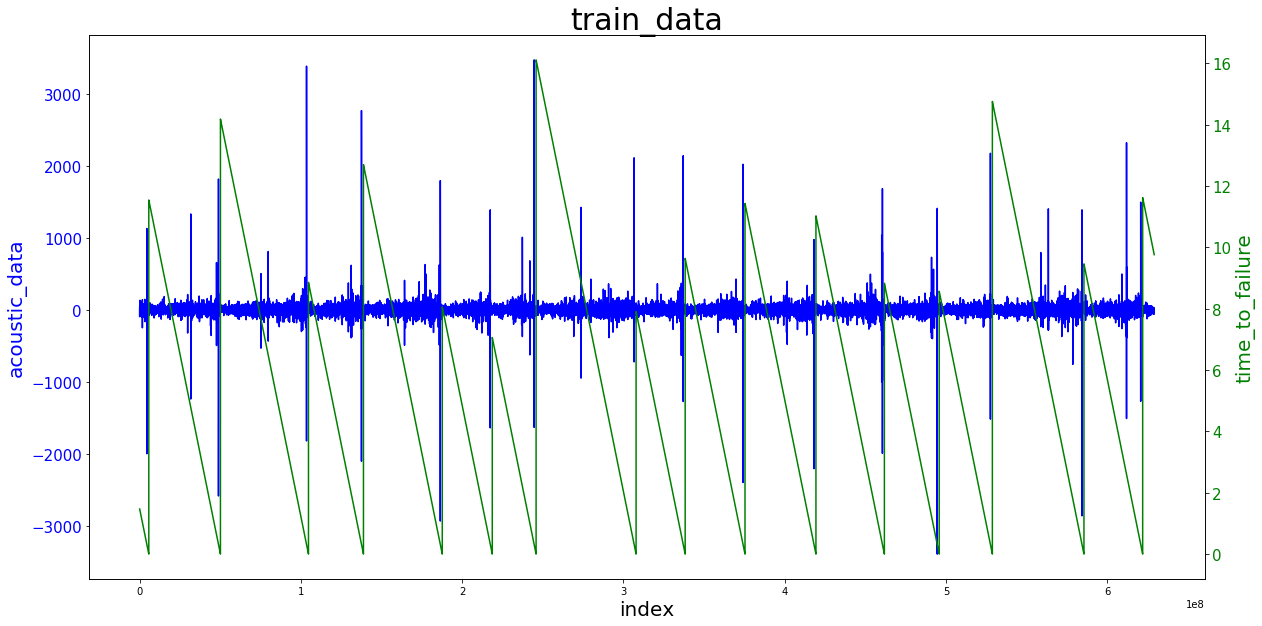

In [4]:
acoustic_data_per_100 = data.acoustic_data[::10]
time_to_failure_per_100 = data.time_to_failure[::10]


fig, ax1 = plt.subplots(figsize=(20, 10))
plt.title("train_data", fontsize = 30)
ax1.plot(acoustic_data_per_100, color = "blue")
ax1.set_xlabel("index", fontsize = 20)
ax1.set_ylabel("acoustic_data", color = "blue", fontsize = 20)
ax1.tick_params(axis="x",labelsize = 10)
ax1.tick_params(axis="y", labelcolor="blue", labelsize = 15)
ax1.plot()

ax2 = ax1.twinx()
ax2.plot(time_to_failure_per_100, color = "green")
ax2.set_ylabel("time_to_failure", color = "green", fontsize = 20)
ax2.tick_params(axis="y", labelcolor="green", labelsize = 15)
ax2.plot()


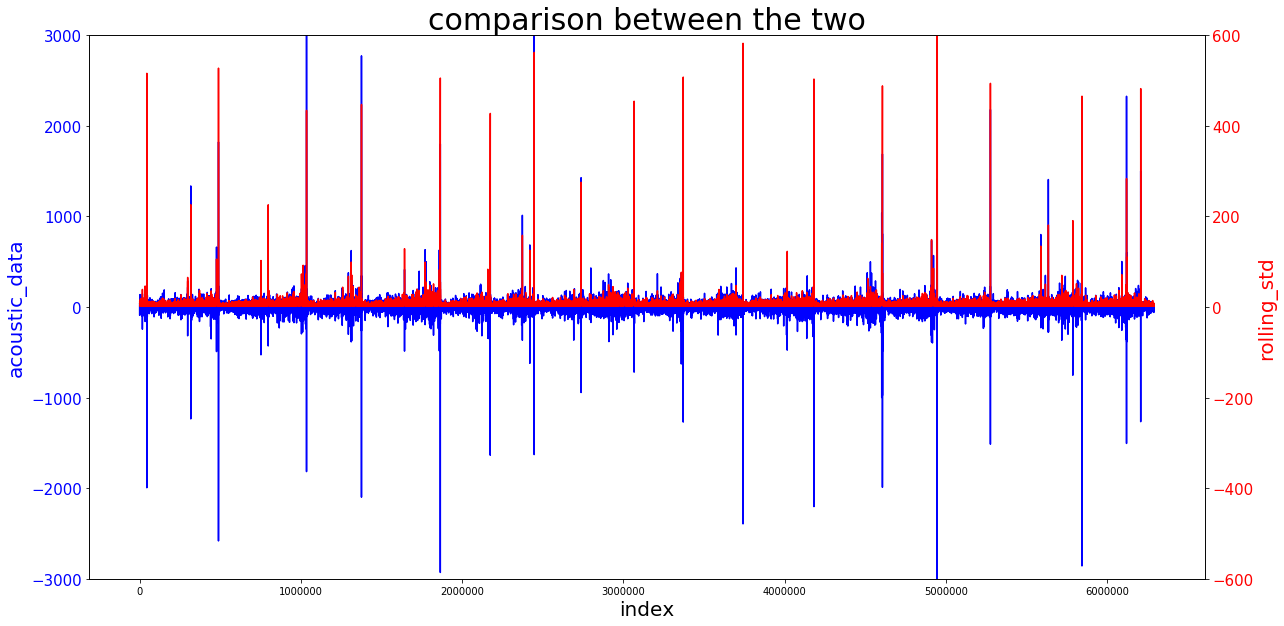

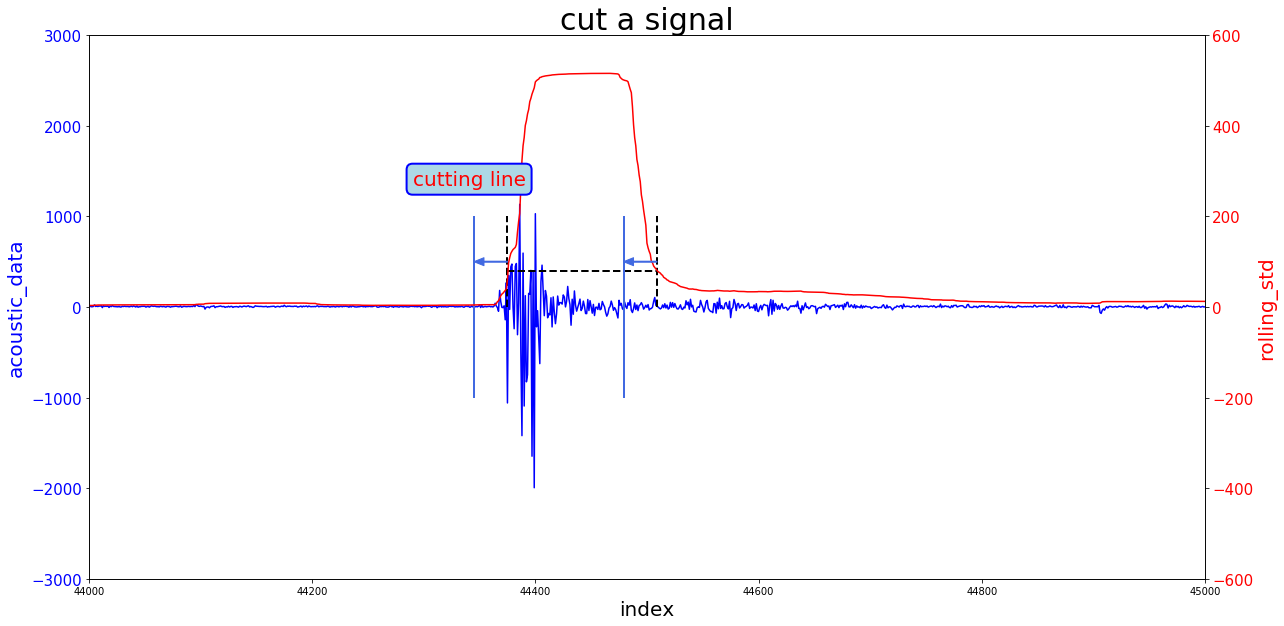

In [5]:
data["rolling_std"] = data.acoustic_data.rolling(window=1000).std()
rolling_std_per_100 = data['rolling_std'].values[::10]
time_to_failure_per_100 = data.time_to_failure[::10]
acoustic_data_per_100 = data.acoustic_data[::10]
index = np.arange(len(acoustic_data_per_100))
bbox = {
    "facecolor" : "lightblue",
    "edgecolor" : "blue",
    "boxstyle" : "Round",
    "linewidth" : 2
}

fig, ax1 = plt.subplots(figsize=(20, 10))
plt.title("comparison between the two", fontsize = 30)
ax1.plot(index,acoustic_data_per_100, color = "blue")
ax1.set_xlabel("index", fontsize = 20)
ax1.set_ylabel("acoustic_data", color = "blue", fontsize = 20)
ax1.set_ylim(-3000,3000)
ax1.tick_params(axis="x",labelsize = 10)
ax1.tick_params(axis="y", labelcolor="blue", labelsize = 15)
ax1.plot()

ax2 = ax1.twinx()
ax2.plot(index,rolling_std_per_100, color = "red")
ax2.set_ylabel("rolling_std", color = "red", fontsize = 20)
ax2.set_ylim(-600,600)
ax2.tick_params(axis="y", labelcolor="red", labelsize = 15)
ax2.plot()

fig, ax1 = plt.subplots(figsize=(20, 10))
plt.title("cut a signal", fontsize = 30)
ax1.plot(index,acoustic_data_per_100, color = "blue")
ax1.set_xlabel("index", fontsize = 20)
ax1.set_ylabel("acoustic_data", color = "blue", fontsize = 20)
ax1.plot([44200, -1000], [44200, 1000], 'k-', lw=2)
ax1.set_xlim(44000,45000)
ax1.set_ylim(-3000,3000)
ax1.tick_params(axis="x",labelsize = 10)
ax1.tick_params(axis="y", labelcolor="blue", labelsize = 15)
ax1.plot()

ax2 = ax1.twinx()
ax2.plot(index,rolling_std_per_100, color = "red")
ax2.hlines(80, 44375, 44509, linestyle='dashed', linewidth=2)
ax2.vlines(44375, 0, 200, linestyle='dashed', linewidth=2)
ax2.vlines(44509, 0, 200, linestyle='dashed', linewidth=2)
ax2.vlines(44345, -200, 200, linestyle='solid', linewidth=2,color = "royalblue")
ax2.vlines(44479, -200, 200, linestyle='solid', linewidth=2,color = "royalblue")
ax2.text(44290,270,"cutting line", size = 20, color = "red" ,bbox = bbox)
ax2.annotate('', xy=[44345,100], xytext=[44375,100],
            arrowprops = dict(shrink=0, width=1, headwidth=8,headlength=10, connectionstyle='arc3',facecolor='royalblue', edgecolor='royalblue')
           )
ax2.annotate('', xy=[44479,100], xytext=[44509,100],
            arrowprops = dict(shrink=0, width=1, headwidth=8,headlength=10, connectionstyle='arc3',facecolor='royalblue', edgecolor='royalblue')
           )
ax2.set_ylabel("rolling_std", color = "red", fontsize = 20)
ax2.set_ylim(-600,600)
ax2.tick_params(axis="y", labelcolor="red", labelsize = 15)
ax2.plot()

del rolling_std_per_100
del acoustic_data_per_100
del time_to_failure_per_100


In [6]:
peak_line = 80
i= 0

start_index = []
end_index = []
sample_num = []

np_std = np.asarray(data.rolling_std)

for i in range(len(data)-1):
    if ((np_std[i] < peak_line ) & ( peak_line <= np_std[i+1])):
        start_index.append(i)
    if ((peak_line <= np_std[i]) & ( np_std[i+1] < peak_line )
    &((len(start_index) -  len(end_index)) ==  1)):
        end_index.append(i)

for i in range (len(start_index)):
    sample_num.append(-(start_index[i] - end_index[i]))

del np_std

In [7]:
data = data.drop("rolling_std", axis = 1)

In [8]:
acoustic_table = np.stack([start_index, end_index , sample_num], axis = 1) #numpy_ndarray

columns = ["start_index", "end_index","sample_num"] #pandas_DataFrame

acoustic_table = pd.DataFrame(acoustic_table , columns=columns)
acoustic_table.start_index = acoustic_table.start_index - 300
acoustic_table.end_index = acoustic_table.end_index - 300

del start_index
del end_index
del sample_num

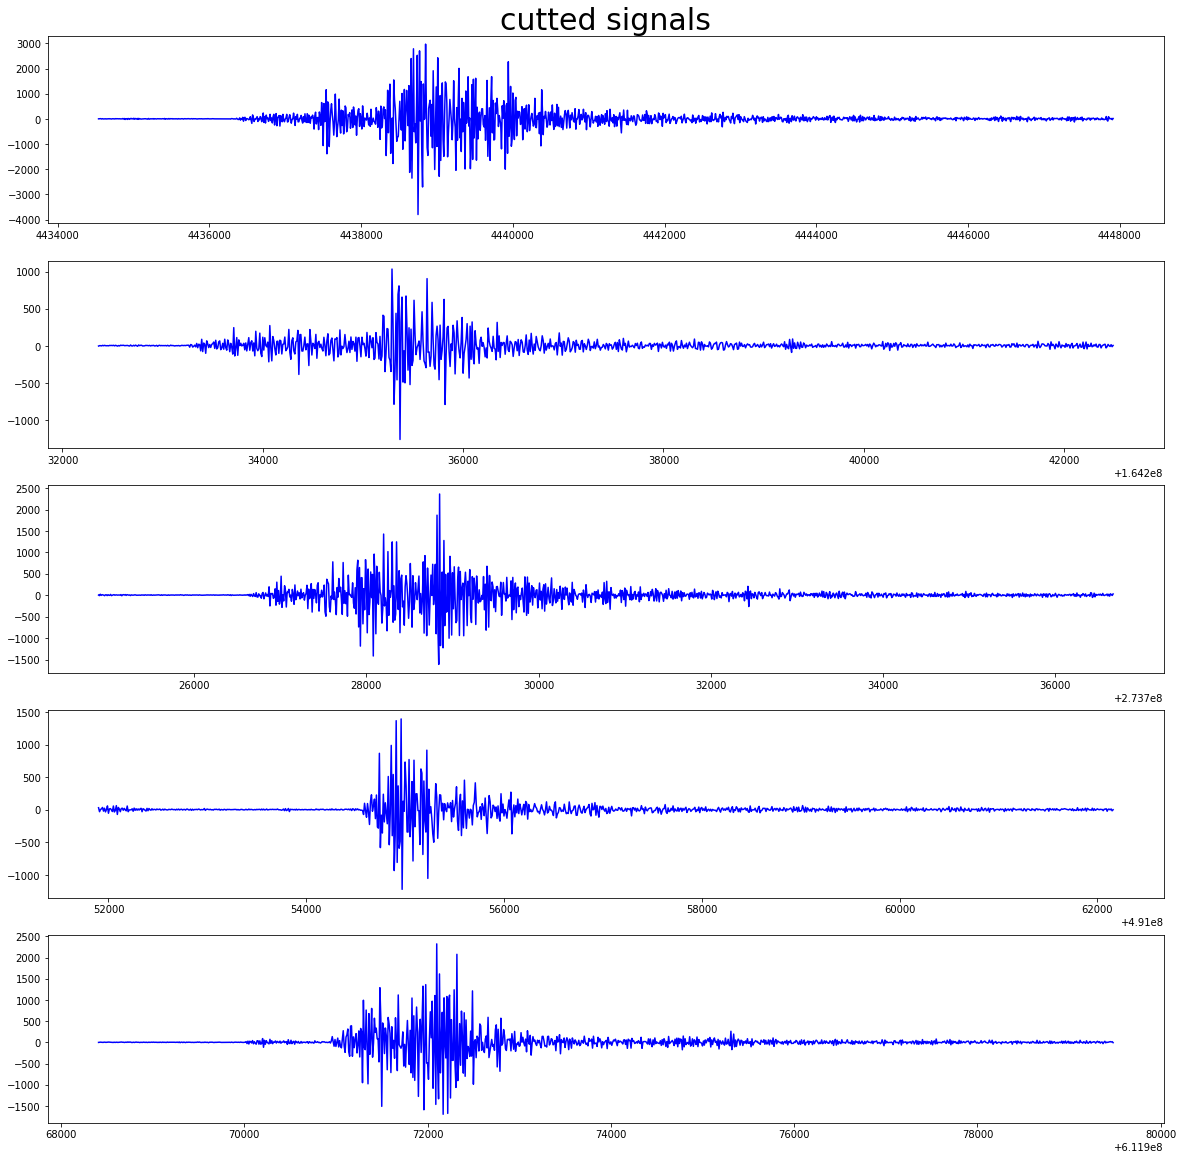

In [9]:
plt.figure(figsize=(20, 20))


work = data.acoustic_data[acoustic_table.start_index[0]:acoustic_table.end_index[0]]
plt.subplot(511)
plt.title("cutted signals", fontsize = 30)
plt.plot(work,color = 'b')

work = data.acoustic_data[acoustic_table.start_index[10]:acoustic_table.end_index[10]]
plt.subplot(512)
plt.plot(work,color = 'b')

work = data.acoustic_data[acoustic_table.start_index[20]:acoustic_table.end_index[20]]
plt.subplot(513)
plt.plot(work,color = 'b')

work = data.acoustic_data[acoustic_table.start_index[30]:acoustic_table.end_index[30]]
plt.subplot(514)
plt.plot(work,color = 'b')

work = data.acoustic_data[acoustic_table.start_index[40]:acoustic_table.end_index[40]]
plt.subplot(515)
plt.plot(work,color = 'b')

del work

In [10]:
f = []
F = []
F_abs = []
work = []
pi = np.pi

fourier_data = []
omega_data = []
energy_data = []

for i in range(len(acoustic_table)):

    f = []
    F = []
    F_abs = []
    omega = []
    fourier_work = data.acoustic_data[acoustic_table.start_index[i]:acoustic_table.end_index[i]]
    N = len(fourier_work)
    half_N = int(N/2 + 1)
    delta_omega = 2*pi/half_N

    #fourier_data
    f.append(fourier_work)
    F.append(np.fft.fft(fourier_work)[0:half_N+1])
    F_abs.append(np.abs(F))
    
    #frequency_data (omega_data)
    omega.append(np.linspace(0, 2*pi, half_N+1))
    
    #energy_data
    U = np.dot(F_abs[0], omega[0])

    fourier_data.append(F_abs)
    omega_data.append(omega)
    energy_data.append(U)

In [11]:
acoustic_table["fourier_data"] = fourier_data
acoustic_table["omega_data"] = omega_data
acoustic_table["energy_data"] = energy_data

del fourier_data
del omega_data
del energy_data

In [12]:
np_index = np.asarray(acoustic_table.start_index)
np_time = np.asarray (data.time_to_failure)

#time_data
time_work = []
i = 0
for i in range(len(acoustic_table)):
    index_work = np_index[i]
    time_work.append(np_time[index_work])
acoustic_table["time_to_failure"] = time_work

del time_work

In [13]:
acoustic_table

,start_index,end_index,sample_num,fourier_data,omega_data,energy_data,time_to_failure
0,443454,444792,1338,"[[[2936.0, 3141.34919898135, 1083.822572753850...","[[0.0, 0.009377888518178487, 0.018755777036356...",[31802844.95638701],0.317897
1,3168002,3169096,1094,"[[[3641.0, 1105.03220380273, 536.163284031588,...","[[0.0, 0.011465666618940851, 0.022931333237881...",[11978319.395247752],4.781199
2,4764371,4765357,986,"[[[4588.0, 561.411852518608, 326.4509740954108...","[[0.0, 0.012718998597529526, 0.025437997195059...",[5314267.699609619],0.634797
3,4886744,4888169,1425,"[[[3926.0, 2620.034612128257, 1078.93674118651...","[[0.0, 0.008812321608947526, 0.017624643217895...",[37852939.09276269],0.316698
4,7521475,7522450,975,"[[[5066.0, 460.1748492648405, 411.370147452904...","[[0.0, 0.01287537972782702, 0.0257507594556540...",[4900080.162367408],7.654096
5,7970776,7971917,1141,"[[[5041.0, 1183.3824134560875, 611.76834004087...","[[0.0, 0.011003827157932725, 0.022007654315865...",[12092658.001027992],6.486896
6,10134697,10135652,955,"[[[4927.0, 167.46396317297652, 357.66351049225...","[[0.0, 0.013144739136358967, 0.026289478272717...",[4301450.331744953],0.865796
7,10346342,10347634,1292,"[[[3935.0, 3573.400592027293, 1663.98966089028...","[[0.0, 0.009711260134744337, 0.019422520269488...",[25645386.850324724],0.315697
8,13117810,13118786,976,"[[[4617.0, 379.5748376813558, 295.856458006856...","[[0.0, 0.012849049707933715, 0.025698099415867...",[4296656.62161073],1.973696
9,13753607,13754915,1308,"[[[6317.0, 229.1574893043622, 3382.33894766447...","[[0.0, 0.0095926493239383, 0.0191852986478766,...",[28503446.633801706],0.321399


The graph of "The relationship of energy and time_to_failure" means high energy datas have same time_to_failures.  Border of high and low energy datas is about understood.
In below graph, border is determined sorted energy data.Border is center of the two energy data these have most wide energy difference.

Text(0, 0.5, 'energy_data')

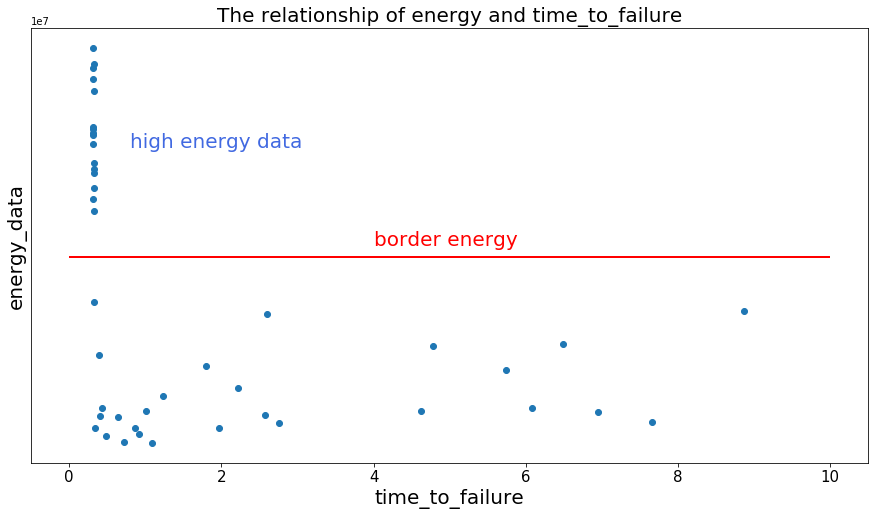

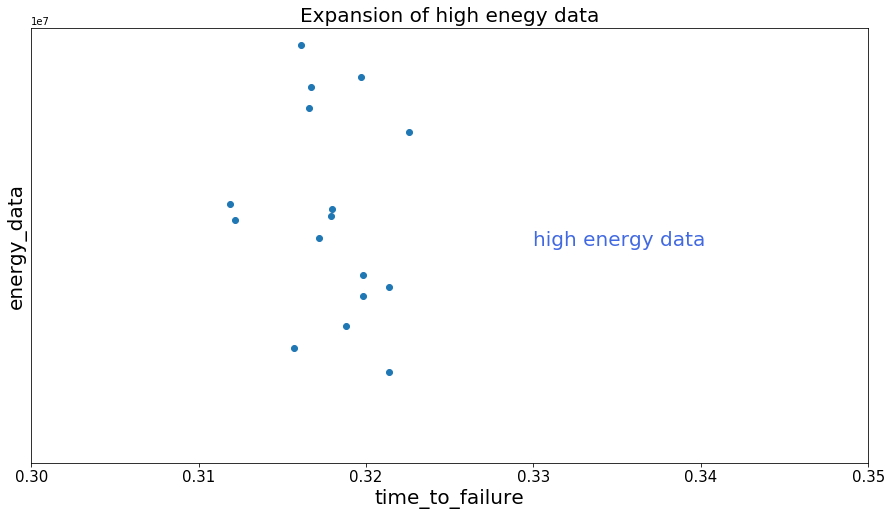

In [14]:
#Border is determined sorted energy data.Border is center of the two enegy data these have most wide difference.
np_energy_data = np.asarray(acoustic_table.energy_data)
np_sort_energy_data = np.sort(np_energy_data)
np_sort_energy_data

np_sort_energy_diffdata = np.diff(np_sort_energy_data) 

high_border_index = (np.argmax(np_sort_energy_diffdata) + 1)
low_border_index = (np.argmax(np_sort_energy_diffdata))
border_energy = (np_sort_energy_data[high_border_index] + np_sort_energy_data[low_border_index])/2

#graph plot
x = (np.asarray(acoustic_table.time_to_failure))
y = (np.asarray(acoustic_table.energy_data))
r = patches.Rectangle(xy=(0, border_energy), width=0.1, height=0.5, ec='#000000', fill=False)

plt.figure(figsize=(15, 8))
plt.scatter(x = x, y = y)
plt.tick_params(axis="x", labelsize = 15)
plt.tick_params(axis="y", labelleft=False, left=False)
plt.title("The relationship of energy and time_to_failure",fontsize = 20)
plt.hlines(border_energy, 0, 10, linestyle='solid', color = "red",linewidth=2)
plt.text(4,border_energy*1.05,"border energy", size = 20, color = "red")
plt.text(0.8,border_energy*1.5,"high energy data", size = 20, color = "royalblue")
plt.xlabel("time_to_failure", fontsize = 20)
plt.ylabel("energy_data", fontsize = 20)

plt.figure(figsize=(15, 8))
plt.scatter(x = x, y = y)
plt.tick_params(axis="x", labelsize = 15)
plt.tick_params(axis="y", labelleft=False, left=False)
plt.title("Expansion of high enegy data",fontsize = 20)
plt.vlines(border_energy, 0, 10, linestyle='solid', color = "red",linewidth=2)
plt.text(0.33,border_energy*1.5,"high energy data", size = 20, color = "royalblue")
plt.xlim(0.3,0.35)
plt.ylim(border_energy,border_energy*2)
plt.xlabel("time_to_failure", fontsize = 20)
plt.ylabel("energy_data", fontsize = 20)

Time_to_failure could be predicted from high energy data's time_to_failure. 
I will calculate time_to_failure from now on.

In [15]:
data["predict_time"] = np.nan

np_energy = np.asarray(acoustic_table.energy_data)
np_predict_time = np.asarray(data.predict_time)

for i in range(len(np_energy)):
    if (np_energy[i] > border_energy):
        np_predict_time[acoustic_table.start_index[i]] = 0.32
data.predict_time = np_predict_time

del np_energy
del np_predict_time

In [16]:
just_before_time_data = data[data.predict_time > 0]
just_before_time_data

,acoustic_data,time_to_failure,predict_time
4434540,4,0.317897,0.32
48867440,44,0.316698,0.32
103463420,-5,0.315697,0.32
137536070,3,0.321399,0.32
186422780,6,0.316598,0.32
217418620,4,0.321397,0.32
244627460,4,0.312198,0.32
306612810,2,0.318797,0.32
337073350,10,0.311899,0.32
374146540,-2,0.319698,0.32


In [17]:
quake_time = pd.DataFrame()

np_predict_time = np.asarray(data.predict_time)
np_wait_start_index = []
np_wait_end_index = []

np_before032_wait_end_index = np.where(np_predict_time == 0.32)
np_before032_wait_end_index = np_before032_wait_end_index[0]

In [18]:
i = 0
index_length_toend = int((0.32/delta_time))

for i in range(len(np_before032_wait_end_index)):
    np_wait_end_index.append(int(np_before032_wait_end_index[i] + index_length_toend))
 
 
np_wait_start_index = np_wait_end_index + np.array(1)
np_wait_start_index = np.insert(np_wait_start_index, 0, 0)
np_wait_end_index.append(np.nan)

quake_time["wait_start_index"] = np_wait_start_index
quake_time["wait_end_index"] = np_wait_end_index

del np_predict_time
del np_wait_end_index
del np_before032_wait_end_index

In [19]:
quake_time

,wait_start_index,wait_end_index
0,0,566720.0
1,566721,5010010.0
2,5010011,10469608.0
3,10469609,13876873.0
4,13876874,18765544.0
5,18765545,21865128.0
6,21865129,24586012.0
7,24586013,30784547.0
8,30784548,33830601.0
9,33830602,37537920.0


In [20]:
np_wait_start_index = np.array(quake_time.wait_start_index)
np_wait_end_index = np.array(quake_time.wait_end_index)
np_wait_end_index = np_wait_end_index.astype(np.int32)
np_predict_time = np.array(data.predict_time)
i = 0
j = 0

for i in range(len(np_wait_end_index-1)):
    j = np_wait_start_index[i]
    k = 0
    sample_num = np_wait_end_index[i] - np_wait_start_index[i]
    while (j < np_wait_end_index[i] +1):
        np_predict_time[j] = (sample_num - k)*delta_time
        j+=1
        k+=1

In [21]:
data.predict_time = np_predict_time

In [22]:
data

,acoustic_data,time_to_failure,predict_time
0,12,1.469100,1.471209
10,5,1.469100,1.471206
20,4,1.469100,1.471204
30,4,1.469100,1.471201
40,0,1.469100,1.471198
50,11,1.469100,1.471196
60,4,1.469100,1.471193
70,6,1.469100,1.471191
80,6,1.469100,1.471188
90,1,1.469100,1.471185


In [23]:
predict_time_work = np_predict_time[~np.isnan(np_predict_time)]
predict_time_work = predict_time_work[::50]

index_work = np.arange(len(predict_time_work))

Text(0, 0.5, 'Predicted time_to_failure')

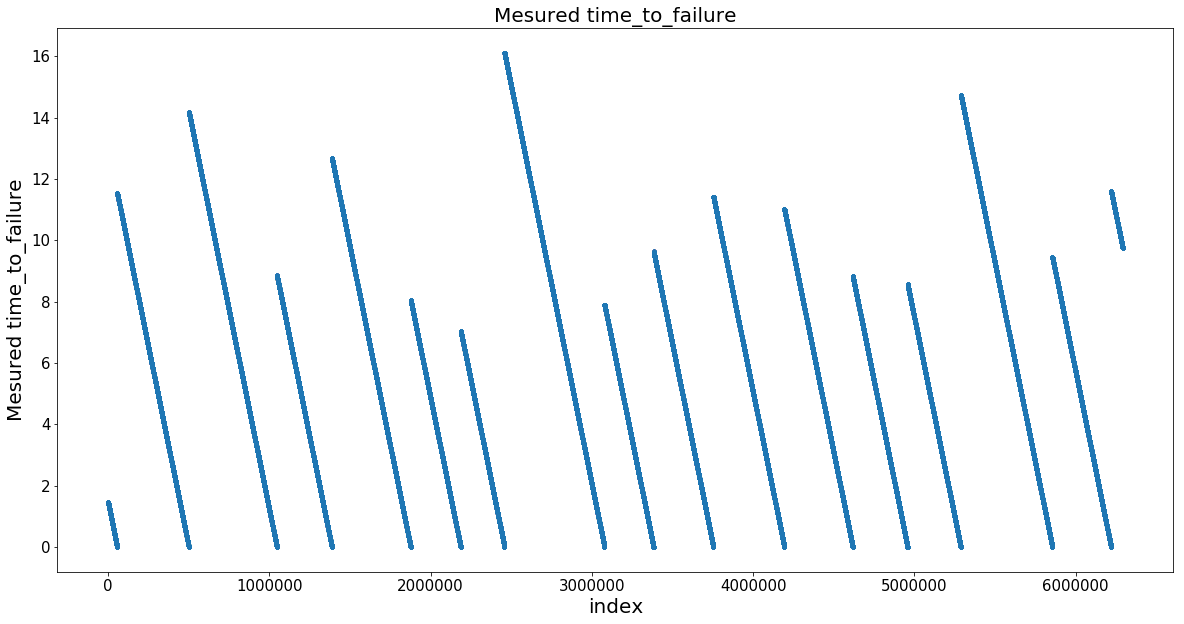

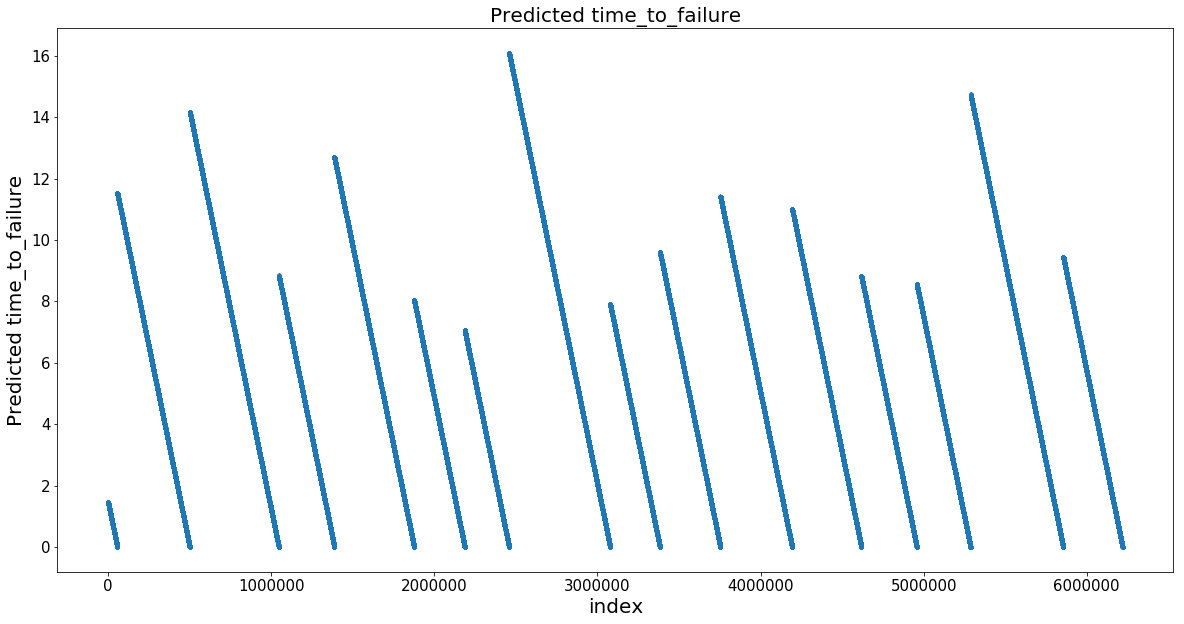

In [24]:
time_to_failure_per_100 = data.time_to_failure[::10]
index_time_to_failure = np.arange(len(time_to_failure_per_100))

predict_time_per_100 = data.predict_time[::10]
predict_time_per_100 = predict_time_per_100[~np.isnan(predict_time_per_100)]
index_predict_time = np.arange(len(predict_time_per_100))

plt.figure(figsize=(20, 10))
plt.scatter(x = index_time_to_failure, y = time_to_failure_per_100, s=5)
plt.tick_params(axis="x", labelsize = 15)
plt.tick_params(axis="y", labelsize = 15)
plt.title("Mesured time_to_failure",fontsize = 20)
plt.xlabel("index", fontsize = 20)
plt.ylabel("Mesured time_to_failure", fontsize = 20)

plt.figure(figsize=(20, 10))
plt.scatter(x = index_predict_time, y = predict_time_per_100, s=5)
plt.tick_params(axis="x", labelsize = 15)
plt.tick_params(axis="y", labelsize = 15)
plt.title("Predicted time_to_failure",fontsize = 20)
plt.xlabel("index", fontsize = 20)
plt.ylabel("Predicted time_to_failure", fontsize = 20)

* Predicted time to failure is seem to same mesured. Here, end data of predicted is nan, becouse of can not read from acoustic_data in this method.
* There was a problem for fitting test data. When cutting signal, threshold size of rolling_std could not be decided individual test data.